<a href="https://colab.research.google.com/github/sooloin/Python-Programming-Assignment/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_5%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mission : 농구 선수의 포지션을 분류해보자!!**

농구선수의 기록으로부터 농구선수의 포지션을 분류하자

a. binary classification (센터인가 아닌가를 분류)

b. multi-class classification (n개의 포지션을 분류)

#1. import libraries

In [3]:
import numpy as np
import pandas as pd

#2. data preparation --> (1) data loading

In [ ]:
from google.colab import files
files.upload()

In [4]:
nbastat = pd.read_csv('nba_stats_2020_to_2023.csv')
m = len(nbastat)
print(m)

2955


#2. data preparation --> (2) 특징 선택


In [18]:
feature = ['Pos', 'FG%', '3P%', 'TRB', 'AST', 'STL', 'BLK']

nbastat2 = nbastat[feature]

nbastat2

,Pos,FG%,3P%,TRB,AST,STL,BLK
0,C,0.592,0.333,9.3,2.3,0.8,1.1
1,PF,0.557,0.143,10.2,5.1,1.1,1.3
2,C,0.493,0.389,7.4,2.4,0.7,1.6
3,C,0.500,NaN,1.5,0.0,0.0,0.0
4,SG,0.368,0.346,1.8,1.9,0.4,0.2
...,...,...,...,...,...,...,...
2950,PF,0.545,0.176,3.1,1.4,1.0,0.1
2951,PG,0.429,0.335,3.0,10.2,1.1,0.1
2952,C,0.593,0.429,2.6,0.2,0.2,0.2
2953,C,0.627,0.000,4.3,0.7,0.2,0.3


#2. data preparation --> (3) 결측치 제거


In [19]:
# 값이 비어있는 항 제거
# isna() 함수 --> 결측값을 가지고 있는가?
rows_with_na = nbastat2[nbastat2.isna().any(axis=1)] # any -> 한개라도 있다면 불어라
print(rows_with_na)
# na가 있는 행들을 모두 골라냈음.
# 그리고 이러한 na가 있는 모든 행들을 지워버릴 것임.

print(len(nbastat2))

      Pos    FG%  3P%  TRB  AST  STL  BLK
3       C  0.500  NaN  1.5  0.0  0.0  0.0
13     PF  1.000  NaN  0.6  0.4  0.0  0.0
22    NaN    NaN  NaN  NaN  NaN  NaN  NaN
53    NaN    NaN  NaN  NaN  NaN  NaN  NaN
58      C  0.543  NaN  5.8  0.9  0.2  0.9
...   ...    ...  ...  ...  ...  ...  ...
2885  NaN    NaN  NaN  NaN  NaN  NaN  NaN
2910  NaN    NaN  NaN  NaN  NaN  NaN  NaN
2927   SG    NaN  NaN  1.0  0.0  0.0  0.0
2933  NaN    NaN  NaN  NaN  NaN  NaN  NaN
2935    C  0.637  NaN  7.1  0.4  0.7  1.0

[274 rows x 7 columns]
2955


-> 결측치가 있는 행이 274

=> 결측치가 없는 행이 2681행

In [20]:
# dropna(axis = 0 or 1) 함수 -> 결측값이 있는 (비어있는) 행 또는 열을 아예 삭제해주세요
# fillna()는 결측값이 있는 곳을 0으로 채워주세요.
nbastat2 = nbastat2.dropna(axis=0)
print(len(nbastat2))

2681


#2. data preparation --> (4) 이상치 제거

Position이 C, PG, SG, SF, PF 아닌 행들을 이상치라고 한다.

In [22]:
# 즉, 포지션이 C, PG, SG, SF, PF가 아닌 행을 제거
# Pos가 C, PG, SG, SF, PF인 행만 선택

print(len(nbastat2))

nbastat3 = nbastat2[(nbastat2['Pos']=='C') | (nbastat2['Pos']=='PG') |
                    (nbastat2['Pos']=='SG') | (nbastat2['Pos']=='SF') | (nbastat2['Pos']=='PF')]

print(nbastat3)

2681
     Pos    FG%    3P%   TRB   AST  STL  BLK
0      C  0.592  0.333   9.3   2.3  0.8  1.1
1     PF  0.557  0.143  10.2   5.1  1.1  1.3
2      C  0.493  0.389   7.4   2.4  0.7  1.6
4     SG  0.368  0.346   1.8   1.9  0.4  0.2
5     SG  0.466  0.404   2.2   1.4  0.3  0.1
...   ..    ...    ...   ...   ...  ...  ...
2950  PF  0.545  0.176   3.1   1.4  1.0  0.1
2951  PG  0.429  0.335   3.0  10.2  1.1  0.1
2952   C  0.593  0.429   2.6   0.2  0.2  0.2
2953   C  0.627  0.000   4.3   0.7  0.2  0.3
2954   C  0.634  0.000   9.9   1.0  0.4  1.3

[2632 rows x 7 columns]


2681 row -> 2632 row로 변한 것을 알 수 있음.

즉, 2632개의 데이터가 결측치, 이상치가 없는 데이터임을 알 수 있음.

#2. data preparation --> (5) 변수 설정


In [24]:
# feature = ['Pos', 'FG%', '3P%', 'TRB', 'AST', 'STL', 'BLK']

x1 = nbastat3[['FG%']]
x2 = nbastat3[['3P%']]
x3 = nbastat3[['TRB']]
x4 = nbastat3[['AST']]
x5 = nbastat3[['STL']]
x6 = nbastat3[['BLK']]
y = nbastat3[['Pos']]

m = len(y) # data 개수 => m
print(m) # m의 데이터 개수가 2632개여야 하는데 잘 들어갔는지 확인

2632


## ! 이상치 제거 확인 !



In [25]:
# y의 값이 C, PG, SG, SF, PF만 있는지 확인
# 우리가 정하지 않은 다른 data가 있으면 곤란하기 때문이다.
unique = y.drop_duplicates()
print(unique)

# 각 C, PG, SG, SF, PF가 먼저 나온 행 보여줌

   Pos
0    C
1   PF
4   SG
7   PG
10  SF


## binary classification : C를 class 1, 그 이외의 값을 class 0으로 labeling

## multi-class classification : C는 2, PF나 SF는 1, PG나 SG는 0으로 labeling

In [27]:
# yb : binary classification용 변수 : C는 1, 그 외는 0
# yt : muticalss classification

yb = nbastat3['Pos'].apply(lambda x: 1 if x == 'C' else 0)

yt = nbastat3['Pos'].map({'C':2, 'PF':1, 'SF':1, 'PG':0, 'SF':0})

# 2. data preparation --> (6) 변수 벡터 설정


In [55]:
# Xb = [1, x1, ..., x6]
# yb = numpy의 array로 변환

x0 = np.ones((m,1))
Xb = np.c_[x0, x1, x2, x3, x4, x5, x6]

yb = (np.array(yb)).reshape(m,1)

print(Xb.shape)
print(yb.shape)
print(type(Xb), type(yb))

(2632, 7)
(2632, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# 2. data preparation --> (7) train-test set 분할


In [63]:
# np의 random permutation을 사용
def permutation_split(X, Y, ratio = 0.7, random_state = 1004):
  # train set의 크기 : num_a, test_set의 크기 : num_b
  num_a = int(X.shape[0]*ratio)
  num_b = X.shape[0]-num_a

  np.random.seed(random_state)
  shuffle = np.random.permutation(X.shape[0])

  X = X[shuffle, :]
  Y = Y[shuffle, :]

  Xa = X[:num_a]
  Ya = Y[:num_a]
  Xb = X[num_a:]
  Yb = Y[num_a:]

  return Xa, Xb, Ya, Yb

In [70]:
Xb_train, Xb_test, Y_train, Y_test = permutation_split(Xb, yb, 0.6)

print(len(Xb_train))
print(len(Xb_test))
print(len(Y_train))
print(len(Y_test))

# data가 2636개였는데 1579개의 data가 train data에 들어갔고
# 1053개의 data가 test data에 들어감.

# 따라서 우리는 train data로 모델을 돌려보고, test data를 돌려서 결과 확인 가능

1579
1053
1579
1053


여기까지가... data 준비 과정

이제 numpy를 이용한 AI의 모델을 구현할 것임.


#3. Numpy를 이용한 구현

#3.1 loss 함수 정의

In [65]:
# cross entropy 함수 : -mean(y * log(y_hat) + (1-y)*log(1 - y_hat))
# 조심 또 조심 :NaN --> divide-by-zero, -inf, +inf 시에 나타남.
# log(0) => -inf --> 피해야 함
# y_hat의 값이 0이면 log(y_hat) => -inf
# y_hat의 값을 (0 ~ 1) => (e ~ 1 - e)
# 1/n => 1/(n + 0.00001)와 비슷

def loss_CE(y_hat, y) :
  epsilon = 1e-15
  y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
  # clip() : y_hat의 값을 epsilon ~ (1-epsilon)의 값으로 mapping 해주세요
  return -np.mean(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

#3.2 model 정의


In [82]:
class LogisticRegressionNumpy: # 와 뭔 소린지 아예모르겠음 감도 안잡힘
  def __init__(self, learning_rate = 0.0001, n_iter = 1000): #hyperparameter를 입력
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.theta = None # model의 parameter

  def sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def train(self, X, y):
    # data의 수(m)와 속성의 수(n)를 결정
    m, n = X.shape
    self.theta = np.zeros((n, 1))

    loss_arr=[]

    #gradients descent method
    for _ in range(self.n_iter):
      # y_hat을 계산
      z = X.dot(self.theta)
      y_hat = self.sigmoid(z)

      # loss 계산
      loss = loss_CE(y_hat, y)
      loss_arr.append(loss)

      # gradients 계산
      gradient = (1/m) * X.T.dot(y_hat - y)

      # gradients descent
      self.theta = self.theta - self.learning_rate * gradient

    return loss_arr

  def predict(self, X, y):
    # y_hat을 계산
    z = X.dot(self.theta)
    y_hat = self.sigmoid(z)

    # logistic regression : y_hat의 값이 0.5보다 적으면 0, 크면 1을 return
    y_hat_clas = [1 if i>0.5 else 0 for i in y_hat]
    return y_hat_clas

#3.3 훈련

In [118]:
# model 선언
model = LogisticRegressionNumpy(learning_rate= 0.1, n_iter = 1000)
loss_arr = model.train(Xb_train, Y_train) # training data로 훈련시키는 것임..

Text(0, 0.5, 'loss')

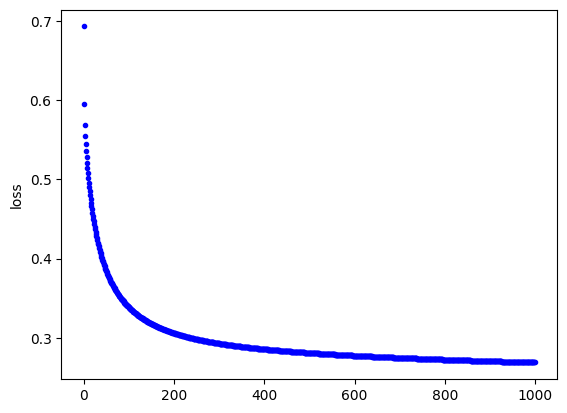

In [119]:
import matplotlib.pyplot as plt # 얘는 numpy 기반 그건가봐

plt.plot(loss_arr, '.b')
plt.ylabel('loss')

#3.4 결과 검증


In [120]:
# prediction(정확도) = 정답 / 전체 데이터의 수

# train data에 대한 결과
prediction = model.predict(Xb_train, Y_train)
# 왜 교수님은 하나만 넣었는데도 잘 되는거지..? 심지어 0 넣어도 결과가 똑같은데 ..
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_train[i])

print(100*(cnt/len(prediction)))

# test data에 대한 결과
prediction = model.predict(Xb_test, Y_test)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_test[i])

print(100*(cnt/len(prediction)))


[88.66371121]
[87.93922127]


#4. Pytorch를 이용한 구현
그냥 이런게 있다~ 하고 넘어가기

#4.1 import libarary

In [121]:
import torch
import torch.nn as nn
import torch.optim as optim

In [122]:
class LogisticRegressionPytorch(nn.Module): # nn.Module을 상속받겠다.
  def __init__ (self, input_size): # 속성의 개수 : n => 7
    super(LogisticRegressionPytorch, self).__init__()
    self.linear = nn.Linear(input_size, 1)
    # 7개의 입력(Xb : 1, ..., x6)을 1개의 출력(z)으로 대응하는 선형 함수 : z = theta * Xb
    self.sigmoid = nn.Sigmoid()

  def forward(self, x): # 결과를 출력하는 함수 : y_hat = sigmoid(-theta * Xb) --> sigmoid(forward(x))
    y_hat = self.sigmoid(self.linear(x))
    return y_hat

  def predict(self, x): # y_hat --> y_hat의 값이 0.5보다 작으면 0, 크면 1을 반환
    y_hat = self.forward(x)
    return [1 if p>0.5 else 0 for p in y_hat]

#4.3 train 함수 정의

In [123]:
def train(model, X, y, learning_rate = 0.0001, n_iter = 10000):
  # loss함수와 gradient method를 선언
  criterion = nn.BCELoss()
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)

  # x와 y의 type을 변경 : X, Y는 numpy의 ndarray --> pytorch의 tensor type
  X = torch.tensor(X, dtype = torch.float32)
  y = torch.tensor(y, dtype = torch.float32).view(-1,1)
  # view(-1,1) : 그리고 그 때의 차원을 nx1차원에서 1차원으로 바꿔주세요

  loss_arr=[]
  for _ in range(n_iter):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss_arr.append(loss) # loss는 pytorch의 data type임

    # gradient 구하기
    loss.backward()

    # gradient descent 구하기
    optimizer.step()

  return loss_arr

#4.4 training

In [132]:
model = LogisticRegressionPytorch(input_size = 7)
loss_arr = train(model, Xb_train, Y_train, learning_rate = 0.01, n_iter = 100000)

In [134]:
# # import matplotlib.pyplot as plt
# plt.plot(loss_arr, '.g')
# plt.ylabel('loss')
# loss가 현재 pytorch의 데이터 타입이라서 plt로 표현 xx
# 데이터 타입을 바꿔주면 표현 가능해용

#4.5 결과 측정

In [135]:
# prediction(정확도) = 정답 / 전체 데이터의 수

# train data에 대한 결과
X = torch.tensor(Xb_train, dtype=torch.float32) # 텐서로 바꾸기
prediction = model.predict(X)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_train[i])

print(100*(cnt/len(prediction)))

# test data에 대한 결과
X = torch.tensor(Xb_test, dtype=torch.float32)
prediction = model.predict(X)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_test[i])

print(100*(cnt/len(prediction)))

[90.56364788]
[89.64862298]


#5. scikit-learn을 이용한 구현

#5.1 import library

In [138]:
from sklearn.linear_model import LogisticRegression

#5.2 model 정의 및 훈련

In [139]:
model = LogisticRegression(max_iter = 1000)

model.fit(Xb_train, Y_train.ravel())

LogisticRegression(max_iter=1000)

#5.3 결과 검증

In [140]:
# prediction(정확도) = 정답 / 전체 데이터의 수

# train data에 대한 결과
prediction = model.predict(Xb_train)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_train[i])

print(100*(cnt/len(prediction)))

# test data에 대한 결과
prediction = model.predict(Xb_test)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_test[i])

print(100*(cnt/len(prediction)))

[90.43698543]
[89.3637227]


5번을 보면 알 수 있듯이 거의 대부분의 모델을 호출해서 사용할 수 있음.

4줄로 대부분의 AI model을 구현할 수 있는 것임..

그니까 앞으로 내가 모델 구현했을 때, 맞는지 확인하고 싶으면 Scikit-learn 라이브러리 사용해서 확인하는 것도 좋은 방법!